<a href="https://colab.research.google.com/github/AVData/DS-Unit-1-Build/blob/master/DS-Unit-1-Build/Agustin%20Vargas-Sleep_Data_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [51]:
sc_sleep_data = pd.read_csv('/sleepdata.csv', delimiter=';')
sc_sleep_data.head(20)

Start                  End  ... Heart rate Activity (steps)
0   2018-08-21 00:17:44  2018-08-21 06:31:59  ...          0                0
1   2018-08-22 00:08:58  2018-08-22 06:48:15  ...          0                0
2   2018-08-23 00:26:59  2018-08-23 05:14:15  ...          0                0
3   2018-08-26 02:22:35  2018-08-26 06:25:43  ...          0                0
4   2018-08-27 00:54:25  2018-08-27 08:24:27  ...          0                0
5   2018-08-28 00:23:26  2018-08-28 06:12:45  ...          0              291
6   2018-08-29 05:45:04  2018-08-29 07:33:17  ...          0             2013
7   2018-08-31 01:18:08  2018-08-31 06:31:26  ...          0              757
8   2018-09-01 05:32:35  2018-09-01 07:32:03  ...          0             1222
9   2018-09-02 01:22:20  2018-09-02 08:02:47  ...          0             1420
10  2018-09-04 01:08:49  2018-09-04 06:25:11  ...          0              667
11  2018-09-05 01:22:11  2018-09-05 06:41:47  ...          0             1271
12  2018-09-06 01:43:04  2018-09-06 06:17:20  ...          0             1742
13  2018-09-06 06:39:06  2018-09-06 07:42:15  ...          0                0
14  2018-09-07 01:08:47  2018-09-07 06:01:47  ...          0             1194
15  2018-09-07 06:18:29  2018-09-07 07:09:46  ...          0                0
16  2018-09-08 01:41:00  2018-09-08 08:24:45  ...          0              335
17  2018-09-09 02:37:51  2018-09-09 08:42:33  ...          0             1420
18  2018-09-10 07:03:52  2018-09-10 07:59:08  ...          0                0
19  2018-09-10 08:21:32  2018-09-10 08:44:09  ...          0                0

[20 rows x 8 columns]

In [52]:
sc_sleep_data.isnull().any()

Start               False
End                 False
Sleep quality       False
Time in bed         False
Wake up              True
Sleep Notes          True
Heart rate          False
Activity (steps)    False
dtype: bool

In [53]:
sc_sleep_data.isnull().sum()

Start                 0
End                   0
Sleep quality         0
Time in bed           0
Wake up             227
Sleep Notes         242
Heart rate            0
Activity (steps)      0
dtype: int64

In [54]:
test_replace = sc_sleep_data['Wake up'].map({':|': 0, ':)': 1, ':(': -1})
print(test_replace.describe())
test_replace.isnull().value_counts()

count    192.000000
mean       0.177083
std        0.501198
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Wake up, dtype: float64


True     227
False    192
Name: Wake up, dtype: int64

In [55]:
sc_sleep_data['Wake up'] = sc_sleep_data['Wake up'].map({':|': 0, ':)': 1, ':(': -1})
sc_sleep_data['Wake up'].describe()

count    192.000000
mean       0.177083
std        0.501198
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Wake up, dtype: float64

In [56]:
print(sc_sleep_data['Wake up'].isnull().value_counts(), '\n')


True     227
False    192
Name: Wake up, dtype: int64 



In [29]:
# # replacing the NaN values in columns 'Wake up' and 'Sleep Notes' with the 
# # column mean

# sc_sleep_data['Wake up'] = sc_sleep_data['Wake up'].fillna(sc_sleep_data['Wake up'].mean())
# sc_sleep_data['Wake up'].describe()

count    419.000000
mean       0.177083
std        0.338796
min       -1.000000
25%        0.000000
50%        0.177083
75%        0.177083
max        1.000000
Name: Wake up, dtype: float64

In [57]:
sc_sleep_data['Wake up'].isnull().value_counts()

True     227
False    192
Name: Wake up, dtype: int64

In [58]:
# Dropping the 'Heart rate' column

sc_sleep_data = sc_sleep_data.drop(columns='Heart rate')
sc_sleep_data.describe()

Wake up  Activity (steps)
count  192.000000        419.000000
mean     0.177083       2046.940334
std      0.501198       2163.332875
min     -1.000000          0.000000
25%      0.000000        657.000000
50%      0.000000       1748.000000
75%      0.000000       2845.500000
max      1.000000      20264.000000

In [59]:
# converting percentages to floats

sc_sleep_data['Sleep quality'] = sc_sleep_data['Sleep quality'].str.rstrip('%').astype('float') / 100
sc_sleep_data['Sleep quality'].head()

0    0.55
1    0.77
2    0.57
3    0.35
4    0.62
Name: Sleep quality, dtype: float64

In [60]:
sc_sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 7 columns):
Start               419 non-null object
End                 419 non-null object
Sleep quality       419 non-null float64
Time in bed         419 non-null object
Wake up             192 non-null float64
Sleep Notes         177 non-null object
Activity (steps)    419 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 23.0+ KB


In [61]:
# Leaving this for a bit later.  Working on datetime column

np.dtype(sc_sleep_data['Sleep Notes'])

dtype('O')

In [62]:
# Looking to create a column of days

sc_sleep_data['Start'].describe()

count                     419
unique                    419
top       2019-07-23 06:41:34
freq                        1
Name: Start, dtype: object

In [ ]:
# # Test to find day of the week
# copy_1_date = pd.Timestamp(sc_sleep_data['Start'][0])

# copy_1_date.dayofweek

In [64]:
sc_sleep_data['Weekday'] =  pd.to_datetime(sc_sleep_data['Start'], infer_datetime_format=True)
sc_sleep_data['Weekday'] = sc_sleep_data['Weekday'].apply(lambda time: time.dayofweek)
sc_sleep_data.head(20)

Start                  End  ...  Activity (steps) Weekday
0   2018-08-21 00:17:44  2018-08-21 06:31:59  ...                 0       1
1   2018-08-22 00:08:58  2018-08-22 06:48:15  ...                 0       2
2   2018-08-23 00:26:59  2018-08-23 05:14:15  ...                 0       3
3   2018-08-26 02:22:35  2018-08-26 06:25:43  ...                 0       6
4   2018-08-27 00:54:25  2018-08-27 08:24:27  ...                 0       0
5   2018-08-28 00:23:26  2018-08-28 06:12:45  ...               291       1
6   2018-08-29 05:45:04  2018-08-29 07:33:17  ...              2013       2
7   2018-08-31 01:18:08  2018-08-31 06:31:26  ...               757       4
8   2018-09-01 05:32:35  2018-09-01 07:32:03  ...              1222       5
9   2018-09-02 01:22:20  2018-09-02 08:02:47  ...              1420       6
10  2018-09-04 01:08:49  2018-09-04 06:25:11  ...               667       1
11  2018-09-05 01:22:11  2018-09-05 06:41:47  ...              1271       2
12  2018-09-06 01:43:04  2018-09-06 06:17:20  ...              1742       3
13  2018-09-06 06:39:06  2018-09-06 07:42:15  ...                 0       3
14  2018-09-07 01:08:47  2018-09-07 06:01:47  ...              1194       4
15  2018-09-07 06:18:29  2018-09-07 07:09:46  ...                 0       4
16  2018-09-08 01:41:00  2018-09-08 08:24:45  ...               335       5
17  2018-09-09 02:37:51  2018-09-09 08:42:33  ...              1420       6
18  2018-09-10 07:03:52  2018-09-10 07:59:08  ...                 0       0
19  2018-09-10 08:21:32  2018-09-10 08:44:09  ...                 0       0

[20 rows x 8 columns]

In [68]:
sc_sleep_data['Weekday'].value_counts()

2    72
1    66
4    62
3    61
6    55
0    53
5    50
Name: Weekday, dtype: int64

In [69]:
sc_sleep_data['Start'] = np.array(sc_sleep_data['Start'], dtype=np.datetime64)
sc_sleep_data['End'] = np.array(sc_sleep_data['End'], dtype=np.datetime64)
sc_sleep_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 8 columns):
Start               419 non-null datetime64[ns]
End                 419 non-null datetime64[ns]
Sleep quality       419 non-null float64
Time in bed         419 non-null object
Wake up             192 non-null float64
Sleep Notes         177 non-null object
Activity (steps)    419 non-null int64
Weekday             419 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 26.3+ KB


In [ ]:
from datetime import datetime

In [ ]:
# for i in sc_sleep_data['Time in bed']:
#   sc_sleep_data['Time in bed'] = datetime.strptime(i, '%H:%M').time()
# sc_sleep_data['Time in bed']

In [ ]:
# Formatting 'Time in bed' into date time format with a today's time stamp
# will then remove date, and leave hours and min

sc_sleep_data['Time in bed'] = pd.to_datetime(sc_sleep_data['Time in bed'],
                                              infer_datetime_format=True)

In [72]:
sc_sleep_data.head()

Start                 End  ...  Activity (steps) Weekday
0 2018-08-21 00:17:44 2018-08-21 06:31:59  ...                 0       1
1 2018-08-22 00:08:58 2018-08-22 06:48:15  ...                 0       2
2 2018-08-23 00:26:59 2018-08-23 05:14:15  ...                 0       3
3 2018-08-26 02:22:35 2018-08-26 06:25:43  ...                 0       6
4 2018-08-27 00:54:25 2018-08-27 08:24:27  ...                 0       0

[5 rows x 8 columns]

In [73]:
# It took so long to finally acheive this single code of line.  But i finally
# got the column 'Time in bed' into time format

sc_sleep_data['Time in bed'] = sc_sleep_data['Time in bed'].dt.time
sc_sleep_data

Start                 End  ...  Activity (steps) Weekday
0   2018-08-21 00:17:44 2018-08-21 06:31:59  ...                 0       1
1   2018-08-22 00:08:58 2018-08-22 06:48:15  ...                 0       2
2   2018-08-23 00:26:59 2018-08-23 05:14:15  ...                 0       3
3   2018-08-26 02:22:35 2018-08-26 06:25:43  ...                 0       6
4   2018-08-27 00:54:25 2018-08-27 08:24:27  ...                 0       0
..                  ...                 ...  ...               ...     ...
414 2019-11-11 01:43:08 2019-11-11 07:18:20  ...                 0       0
415 2019-11-12 00:35:05 2019-11-12 07:32:30  ...              3687       1
416 2019-11-13 01:52:17 2019-11-13 07:15:48  ...              2323       2
417 2019-11-14 00:56:41 2019-11-14 06:45:00  ...              2415       3
418 2019-11-15 01:57:58 2019-11-15 07:28:15  ...              1990       4

[419 rows x 8 columns]

In [74]:
# Creating a column containg the dates, and then creating a column cointaning
# time to bed, and time to rise

sc_sleep_data['Date'] = sc_sleep_data['Start'].dt.date
sc_sleep_data['Date']

0      2018-08-21
1      2018-08-22
2      2018-08-23
3      2018-08-26
4      2018-08-27
          ...    
414    2019-11-11
415    2019-11-12
416    2019-11-13
417    2019-11-14
418    2019-11-15
Name: Date, Length: 419, dtype: object

In [77]:
# replacing ints in 'Weekday' column with days of the week using a dictionary

d = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',
     5: 'Saturday', 6: 'Sunday'}
sc_sleep_data['Weekday'] = sc_sleep_data['Weekday'].map(d)
sc_sleep_data.head()

Start                 End  ...    Weekday        Date
0 2018-08-21 00:17:44 2018-08-21 06:31:59  ...    Tuesday  2018-08-21
1 2018-08-22 00:08:58 2018-08-22 06:48:15  ...  Wednesday  2018-08-22
2 2018-08-23 00:26:59 2018-08-23 05:14:15  ...   Thursday  2018-08-23
3 2018-08-26 02:22:35 2018-08-26 06:25:43  ...     Sunday  2018-08-26
4 2018-08-27 00:54:25 2018-08-27 08:24:27  ...     Monday  2018-08-27

[5 rows x 9 columns]

In [ ]:
# we need categorical variable to do a Chi**2 test


cut_points = [0, .2, .4, .6, .8, 1]
label_names = ['0% - 20%', '21% - 40%', '41% - 59%', '60% - 80%', '>80%']
sc_sleep_data['Sleep Quality Categories'] = pd.cut(sc_sleep_data['Sleep quality'], 
                                                  cut_points, labels=label_names)


In [87]:
# New Dataframe excluding the 'Wake up' and 'Sleep Notes' column

new_df = sc_sleep_data[['Start', 'End', 'Sleep quality', 'Time in bed',
                       'Activity (steps)', 'Weekday', 'Date', 'Sleep Quality Categories']]
new_df.head()

Start                 End  ...        Date Sleep Quality Categories
0 2018-08-21 00:17:44 2018-08-21 06:31:59  ...  2018-08-21                41% - 59%
1 2018-08-22 00:08:58 2018-08-22 06:48:15  ...  2018-08-22                60% - 80%
2 2018-08-23 00:26:59 2018-08-23 05:14:15  ...  2018-08-23                41% - 59%
3 2018-08-26 02:22:35 2018-08-26 06:25:43  ...  2018-08-26                21% - 40%
4 2018-08-27 00:54:25 2018-08-27 08:24:27  ...  2018-08-27                60% - 80%

[5 rows x 8 columns]

In [ ]:
print(new_df.info())
print(new_df.isnull().any())
print(new_df.describe())

In [88]:
# Creating a contingency table of observed values from
# 'Weekday' and 'Sleep Quality Categories' columns

new_df['Weekday'].value_counts()
observed = pd.crosstab(new_df['Weekday'], new_df['Sleep Quality Categories'])

observed

Sleep Quality Categories  0% - 20%  21% - 40%  41% - 59%  60% - 80%  >80%
Weekday                                                                  
Friday                           7          2         44          9     0
Monday                          11          2         29          8     2
Saturday                         4          7         22         16     1
Sunday                           2          7         28         18     0
Thursday                         4          9         35         12     0
Tuesday                         11         10         36          9     0
Wednesday                        8         10         46          8     0

In [89]:
from scipy import stats

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f'Chi-Squared: {chi_squared}', '\n')
print(f'P-value: {p_value}', '\n')
print(f'Degrees of Freedom: {dof}', '\n')
print('Expected: \n', np.array(expected))

Chi-Squared: 48.4872428187423 

P-value: 0.002195734466180704 

Degrees of Freedom: 24 

Expected: 
 [[ 6.98800959  6.98800959 35.68345324 11.89448441  0.44604317]
 [ 5.86091127  5.86091127 29.92805755  9.97601918  0.37410072]
 [ 5.63549161  5.63549161 28.77697842  9.59232614  0.35971223]
 [ 6.19904077  6.19904077 31.65467626 10.55155875  0.39568345]
 [ 6.76258993  6.76258993 34.5323741  11.51079137  0.43165468]
 [ 7.43884892  7.43884892 37.98561151 12.6618705   0.47482014]
 [ 8.11510791  8.11510791 41.43884892 13.81294964  0.51798561]]


In [90]:
from scipy.stats.distributions import chi2

print('P-value from chi^2 statistic:', chi2.sf(chi_squared, 24))

P-value from chi^2 statistic: 0.002195734466180704


In [ ]:
# Taking counts for plotting

Friday = observed.iloc[0][0:].values
Monday = observed.iloc[1][0:].values
Saturday = observed.iloc[2][0:].values
Sunday = observed.iloc[3][0:].values
Thursday = observed.iloc[4][0:].values
Tuesday = observed.iloc[5][0:].values
Wednesday = observed.iloc[5][0:].values


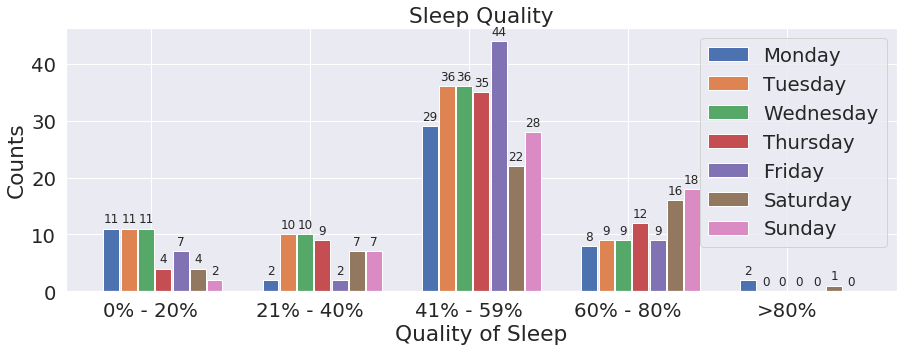

In [268]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['0% - 20%', '21% - 40%', '41% - 59%', '60% - 80%', '>80%']
Friday = observed.iloc[0][0:].values
Monday = observed.iloc[1][0:].values
Saturday = observed.iloc[2][0:].values
Sunday = observed.iloc[3][0:].values
Thursday = observed.iloc[4][0:].values
Tuesday = observed.iloc[5][0:].values
Wednesday = observed.iloc[5][0:].values

x = np.arange(len(labels))  # the label locations
width = 0.08  # the width of the bars

fig, ax = plt.subplots(figsize=(13,5))
rects1 = ax.bar(x - width*3.1, Monday, .1, label='Monday')
rects2 = ax.bar(x - width*1.7, Tuesday, .1, label='Tuesday')
rects3 = ax.bar(x - width*.39, Wednesday, .1, label='Wednesday')
rects4 = ax.bar(x + width*.96, Thursday, .1, label='Thursday')
rects5 = ax.bar(x + width*2.36, Friday, .1, label='Friday')
rects6 = ax.bar(x + width*3.68, Saturday, .1, label='Saturday')
rects7 = ax.bar(x + width*5, Sunday, .1, label='Sunday')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Sleep Quality')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)



fig.tight_layout()
plt.xlabel('Quality of Sleep')
plt.ylabel('Counts')
plt.show()